In [5]:
import matplotlib.pyplot as plt
import json


import matplotlib.pyplot as plt
from pathlib import Path
from coderm.eval.metrics import get_pass_ks
from coderm.utils import gunzip_json_read
import numpy as np
from math import comb

END = 31
START = 3

class ResultSeries:
    def __init__(self, name: str, prefix: str, start: int, end: int, inc: int, data: str, k: int) -> None:
        self.name = name
        self.prefix = prefix
        self.start = start
        self.end = end
        self.inc = inc
        assert data in {"v2", "train"}
        self.data = data
        self.k = k

        self.paths = [f"{self.prefix}{i}" for i in range(self.start, self.end, self.inc)]
        self.idxs = list(range(self.start, self.end, self.inc))
        assert self.check_valid()
    
    def check_valid(self) -> bool:
        return all(Path(p).exists() for p in self.paths)
    
    def process_results(self):
        all_pass_ks = []
        for i, r in zip(self.idxs, self.paths):
            print(f"Reading", r)
            items = gunzip_json_read(r)["items"]
            upper_k = len(items[0]["results"])

            pass_ks = np.mean(get_pass_ks(items, self.k))
            all_pass_ks.append([i, pass_ks])
        return np.array(all_pass_ks)
    
all_results = [
    # ResultSeries("Hugh-LCBv2", "../../test_results/chv2retb", 0, 30, 3, "v2", 1),
    # ResultSeries("llamafix1e-7", "../../test_results/chllamafix1e-7_", 0, 2701, 225, "v2", 1),
    ResultSeries("workbettertests", "../../test_results/ch_workbettertests_", 0, 2401, 200, "v2", 1),
    ResultSeries("reward", "../../test_results/ch_workreward1_", 0, 2801, 200, "v2", 1),
    # ResultSeries("Hugheee-LCB_C", "../../test_results/ch", 0, 30, 3, "v2", 1),
    # ResultSeries("Hugh-LCBv2_30@1", "../../test_results/chv2_30_", 0, 30, 3, "v2", 1),
    # ResultSeries("FixedData-LCBv2", "../../test_results/chv2ll_", 0, 30, 3, "v2", 1),
    # ResultSeries("GPTData-LCBv2", "../../test_results/chgv2_1_", 0, 30, 3, "v2", 1),
    # ResultSeries("Hugh-Train", "../../test_results/chtrain_", 0, 30, 3, "train", 1),
    # ResultSeries("Hugh-Valid", "../../test_results/chhold_", 3, 30, 3, "train", 1),
]

In [6]:
result_dicts = {res_series.name: res_series.process_results() for res_series in all_results}

Reading ../../test_results/ch_workbettertests_0
Reading ../../test_results/ch_workbettertests_200
Reading ../../test_results/ch_workbettertests_400
Reading ../../test_results/ch_workbettertests_600
Reading ../../test_results/ch_workbettertests_800
Reading ../../test_results/ch_workbettertests_1000
Reading ../../test_results/ch_workbettertests_1200
Reading ../../test_results/ch_workbettertests_1400
Reading ../../test_results/ch_workbettertests_1600
Reading ../../test_results/ch_workbettertests_1800
Reading ../../test_results/ch_workbettertests_2000
Reading ../../test_results/ch_workbettertests_2200
Reading ../../test_results/ch_workbettertests_2400
Reading ../../test_results/ch_workreward1_0
Reading ../../test_results/ch_workreward1_200
Reading ../../test_results/ch_workreward1_400
Reading ../../test_results/ch_workreward1_600
Reading ../../test_results/ch_workreward1_800
Reading ../../test_results/ch_workreward1_1000
Reading ../../test_results/ch_workreward1_1200
Reading ../../test_res

In [7]:
result_dicts

{'workbettertests': array([[0.00000000e+00, 1.76991150e-01],
        [2.00000000e+02, 1.76991150e-01],
        [4.00000000e+02, 1.81415929e-01],
        [6.00000000e+02, 2.03539823e-01],
        [8.00000000e+02, 2.03539823e-01],
        [1.00000000e+03, 2.03539823e-01],
        [1.20000000e+03, 1.90265487e-01],
        [1.40000000e+03, 1.99115044e-01],
        [1.60000000e+03, 1.99115044e-01],
        [1.80000000e+03, 1.90265487e-01],
        [2.00000000e+03, 1.90265487e-01],
        [2.20000000e+03, 2.03539823e-01],
        [2.40000000e+03, 1.85840708e-01]]),
 'reward': array([[0.00000000e+00, 1.76991150e-01],
        [2.00000000e+02, 1.72566372e-01],
        [4.00000000e+02, 1.94690265e-01],
        [6.00000000e+02, 1.99115044e-01],
        [8.00000000e+02, 2.03539823e-01],
        [1.00000000e+03, 1.90265487e-01],
        [1.20000000e+03, 1.90265487e-01],
        [1.40000000e+03, 2.03539823e-01],
        [1.60000000e+03, 1.85840708e-01],
        [1.80000000e+03, 1.94690265e-01],
   

/tmp/ipykernel_1945219/3109052390.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(loc='upper right')


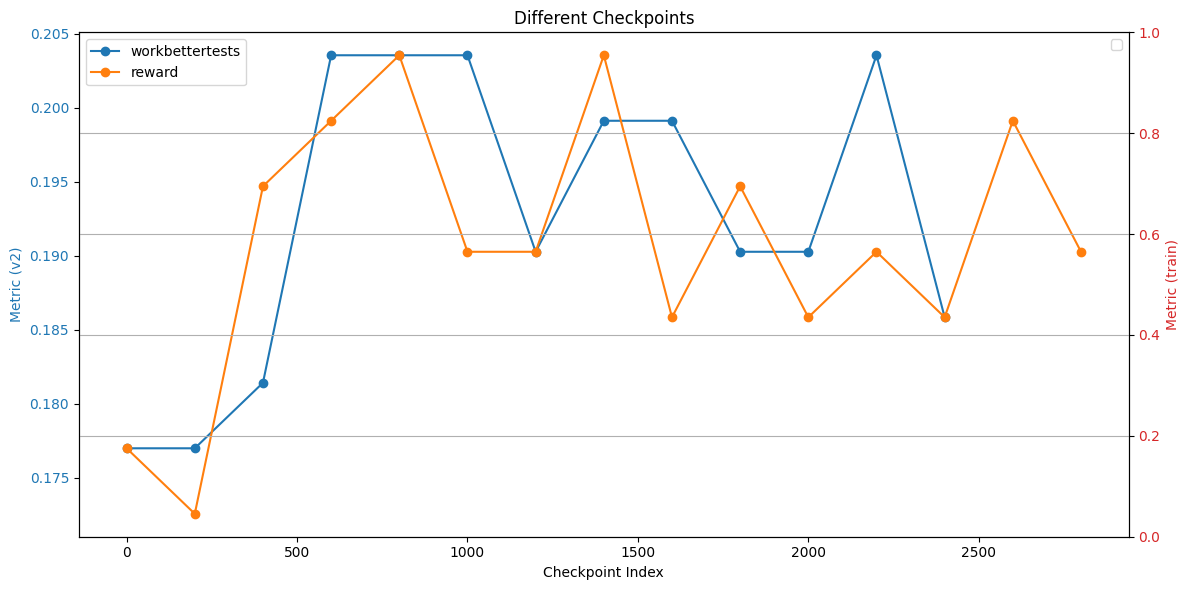

In [8]:
# Plotting the graph for results_dict
fig, ax1 = plt.subplots(figsize=(12, 6))  # Make the figure wider

ax1.set_xlabel('Checkpoint Index')
ax1.set_ylabel('Metric (v2)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Metric (train)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Define colors and line styles for v2 and train datasets
v2_colors = ['tab:blue', 'tab:cyan', 'tab:purple', 'tab:green']
train_colors = ['tab:red', 'tab:orange', 'tab:pink', 'tab:brown']
v2_linestyle = '-'
train_linestyle = ':'

v2_counter = 0
train_counter = 0

for res_series in all_results:
    name = res_series.name
    data_type = res_series.data
    results = result_dicts[name]
    
    if data_type == "v2":
        ax1.plot(results[:, 0], results[:, 1], marker='o', linestyle=v2_linestyle, label=name)
        v2_counter += 1
    elif data_type == "train":
        ax2.plot(results[:, 0], results[:, 1], marker='o', linestyle=train_linestyle, label=name)
        train_counter += 1

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Different Checkpoints')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid(True)
plt.show()
